In [89]:
import pandas as pd
import geopandas as gpd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import seaborn as sns

%matplotlib inline

In [90]:
corona_cases = pd.read_csv('../data/time_series_covid19_confirmed_global.csv')
corona_cases = corona_cases.rename(columns={"Province/State": "province", "Country/Region": "location"})
corona_cases = corona_cases.fillna(0)
corona_cases.location[corona_cases.location == 'US'] = 'United States of America'
# Change from wide form to narrow
corona_cases = corona_cases.melt(id_vars=['province', 'location', 'Lat', 'Long'], var_name='date', value_name="total_cases")
corona_cases['date'] = pd.to_datetime(corona_cases['date'])

corona_cases = corona_cases[corona_cases.total_cases > 0]
corona_cases = corona_cases.sort_values(['date', 'total_cases'])
today = datetime.today().strftime('%d-%m-%Y')
corona_cases.head()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,province,location,Lat,Long,date,total_cases
49,Anhui,China,31.8257,117.2264,2020-01-22,1
52,Fujian,China,26.0789,117.9874,2020-01-22,1
56,Guizhou,China,26.8154,106.8748,2020-01-22,1
58,Hebei,China,39.5490,116.1306,2020-01-22,1
65,Jiangsu,China,32.9711,119.4550,2020-01-22,1


In [91]:
# Summing up the total_cases for the countries that are seprated by province

countries = corona_cases[corona_cases.province != 0].location.unique().tolist()
for country in countries:
    
    total = {
        'location': country,
        'province': country,
        'date': corona_cases[corona_cases.location == country].date.max(),
        'total_cases': sum(corona_cases.total_cases[(corona_cases.location == country) & (corona_cases.date == corona_cases[corona_cases.location == country].date.max())])
    }
    corona_cases = corona_cases.append(total, ignore_index=True)


corona_cases = corona_cases.sort_values(["date", 'location']).drop_duplicates(subset =['location'], keep = 'last') 



In [92]:
death_dataset = pd.read_csv('../data/time_series_covid19_deaths_global.csv')
death_dataset = death_dataset.rename(columns={"Province/State": "province", "Country/Region": "location"})
death_dataset = death_dataset.fillna(0)
death_dataset.location[death_dataset.location == 'US'] = 'United States of America'
# Change from wide form to narrow
death_dataset = death_dataset.melt(id_vars=['province', 'location', 'Lat', 'Long'], var_name='date', value_name="total_deaths")
death_dataset['date'] = pd.to_datetime(death_dataset['date'])

death_dataset = death_dataset[death_dataset.total_deaths > 0]
death_dataset = death_dataset.sort_values(['date', 'total_deaths'])
death_dataset.head()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,province,location,Lat,Long,date,total_deaths
62,Hubei,China,30.9756,112.2707,2020-01-22,17
303,Hebei,China,39.5490,116.1306,2020-01-23,1
307,Hubei,China,30.9756,112.2707,2020-01-23,17
548,Hebei,China,39.5490,116.1306,2020-01-24,1
549,Heilongjiang,China,47.8620,127.7615,2020-01-24,1


In [93]:
# Summing up the total_cases for the countries that are seprated by province

countries = death_dataset[death_dataset.province != 0].location.unique().tolist()
for country in countries:
    
    total = {
        'location': country,
        'province': country,
        'date': death_dataset[death_dataset.location == country].date.max(),
        'total_deaths': sum(death_dataset.total_deaths[(death_dataset.location == country) & (death_dataset.date == death_dataset[death_dataset.location == country].date.max())])
    }
    death_dataset = death_dataset.append(total, ignore_index=True)


death_dataset = death_dataset.sort_values(["date", 'location']).drop_duplicates(subset =['location'], keep = 'last') 


In [94]:
world_map = gpd.read_file('../maps/world/ne_10m_admin_0_countries.shp')

In [95]:
death_map = world_map.set_index('SOVEREIGNT').join(death_dataset.set_index('location'))
death_map = death_map.fillna(0)
death_map = death_map[death_map.ADMIN != 'Antarctica']

In [96]:
corona_map = world_map.set_index('SOVEREIGNT').join(corona_cases.set_index('location'))
# corona_map = corona_map.fillna(0)
corona_map = corona_map[corona_map.ADMIN != 'Antarctica']

## Corona Death rate

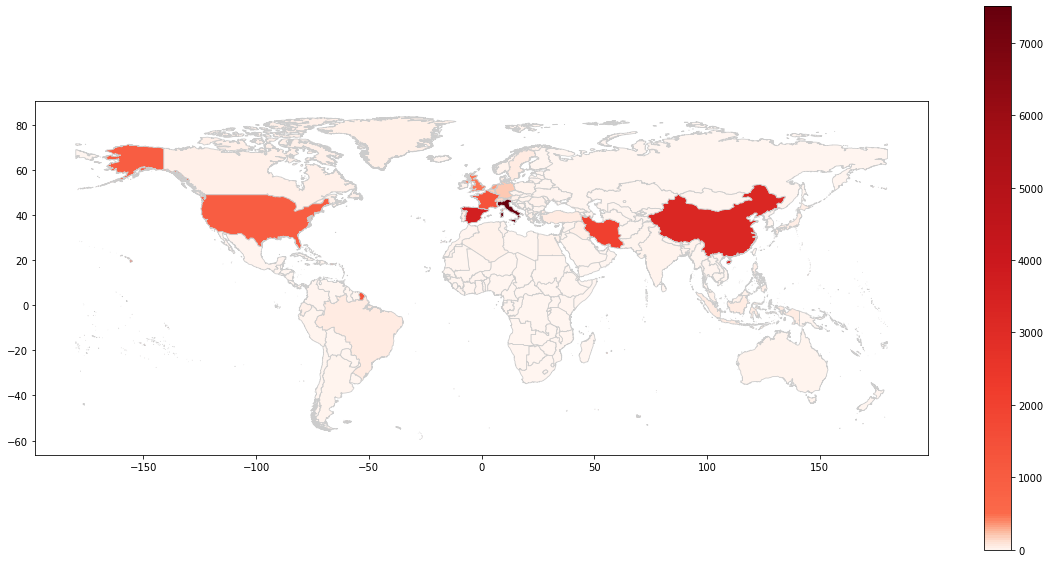

In [97]:
variable = 'total_deaths'
# set the range for the choropleth
vmin, vmax = 10, death_map.total_deaths.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))
divnorm = colors.DivergingNorm(vmin=0, vcenter=500, vmax=vmax)

death_map.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=divnorm)
plt.show()
ax.axis('off')


# add a title
ax.set_title('Corona Death rate', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Mohammed Alawami!',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')


fig.savefig('testmap.png', dpi=300)
plt.show()


## Corona Cases

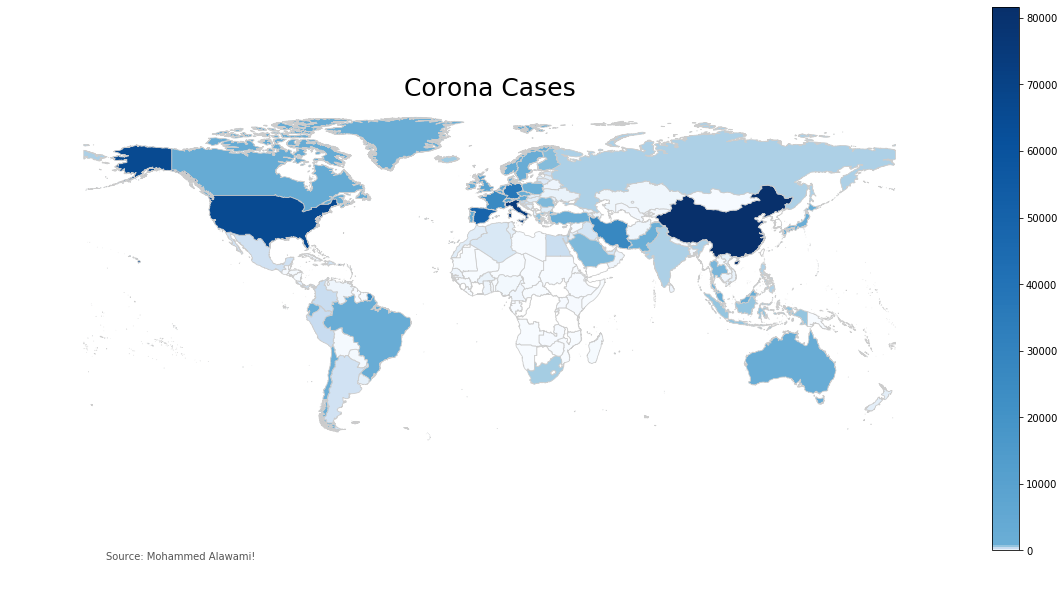

In [121]:
variable = 'total_cases'
# set the range for the choropleth
vmin, vmax = 10, corona_map.total_cases.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))
cmap = 'Blues'

divnorm = colors.DivergingNorm(vmin=0, vcenter=1000, vmax=vmax)

corona_map.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', norm=divnorm, legend=True, missing_kwds={"color": "white"})

ax.axis('off')
# add a title
ax.set_title('Corona Cases', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Mohammed Alawami!',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')
plt.show()

fig.savefig('testmap2.png', dpi=300)

### Possible color values are:
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

## Saudi Map

In [99]:
saudi_map = gpd.read_file('../maps/saudi/mygeodata/Saudi_District_KML-polygon.shp')

In [100]:
saudi_cases = pd.read_excel('../data/corona_cases_ksa.xlsx')

In [103]:
MOH_hospital_beds = pd.read_excel('../data/rate_of_moh_hospital_beds.xlsx')

In [101]:
saudi_province = saudi_cases.groupby(['province', 'map_name']).agg({'new_cases': sum}).reset_index()
saudi_province = saudi_province.rename(columns={'new_cases': 'total_cases'})

In [102]:
saudi = saudi_cases.groupby(['date']).agg({'new_cases': sum, 'total_cases': max}).reset_index()

In [104]:
saudi_corona_map = saudi_map.set_index('Name').join(saudi_province.set_index('map_name'))

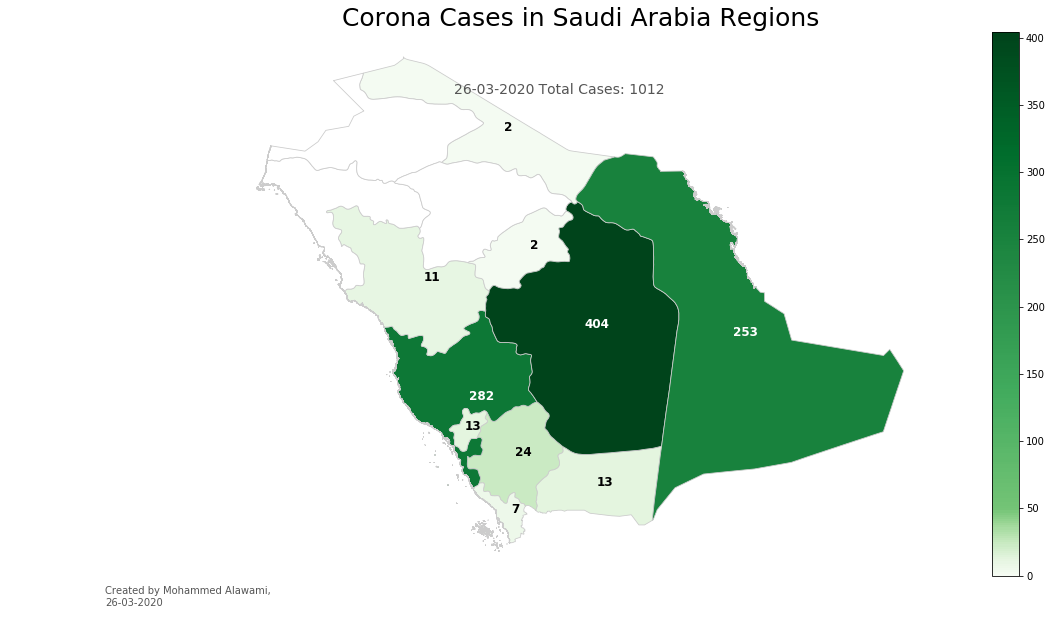

In [105]:
saudi_corona_map["rep"] = saudi_corona_map["geometry"].representative_point()
za_points = saudi_corona_map.copy()
za_points.set_geometry("rep", inplace = True)

variable = 'total_cases'
# set the range for the choropleth
vmin, vmax = saudi_corona_map.total_cases.min(), saudi_corona_map.total_cases.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))
cmap = 'Greens'

divnorm = colors.DivergingNorm(vmin=0, vcenter=50, vmax=vmax)

saudi_corona_map.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', norm=divnorm, legend=True, missing_kwds={"color": "white"})


texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["total_cases"]):
    if np.isnan(label) == False:
        if label > 25:
            texts.append(plt.text(x, y, int(label), fontsize = 12, weight='bold', color='white'))
        else:
            texts.append(plt.text(x, y, int(label), fontsize = 12, weight='bold', color='Black'))

ax.axis('off');

# add a title
title = 'Corona Cases in Saudi Arabia Regions'
ax.set_title(title, 
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# ax.set_xlabel(today, fontsize=10)
ax.annotate(today,
           xy=(.47, 0.87), xycoords='figure fraction',
           horizontalalignment='center', verticalalignment='top',
           fontsize=14, color='#555555')

ann = ' Total Cases: {}'.format(sum(saudi_province.total_cases))
ax.annotate(ann,
           xy=(.57, 0.87), xycoords='figure fraction',
           horizontalalignment='center', verticalalignment='top',
           fontsize=14, color='#555555')

# create an annotation for the  data source
ann = 'Created by Mohammed Alawami, \n{}'.format(today)
ax.annotate(ann,
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')





plt.show()

fig.savefig('saudimap.png', dpi=300)

## GCC Map

In [106]:
gcc_map = gpd.read_file('../maps/GCC/mygeodata/GCC_ME_Country-polygon.shp')

In [117]:
countries = ['Saudi Arabia', 'Kuwait', 'Bahrain', 'United Arab Emirates', 'Qatar', 'Oman', 'Egypt', 'Iraq', 'Israel', 'Syria', 'Lebanon', 'Jordan', 'Yemen']
gcc_cases = corona_cases[['location', 'total_cases']][corona_cases.location.isin(countries)]
gcc_cases = gcc_cases.groupby(['location']).agg({'total_cases': max}).reset_index()
gcc_cases

,location,total_cases
0,Bahrain,419
1,Egypt,456
2,Iraq,346
3,Israel,2369
4,Jordan,172
5,Kuwait,195
6,Lebanon,333
7,Oman,99
8,Qatar,537
9,Saudi Arabia,900


In [116]:
gcc_map

,Name,descriptio,altitudeMo,Descript_1,GADMID,NAME_ENGLI,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,...,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,Shape_Leng,Shape_Area,geometry
0,ARE,UNITED ARAB EMIRATES,relativeToGround,None,9,United Arab Emirates,United Arab Emirates,Al Imarat al Arabiyah al Muttahidah,Trucial Coast|Trucial Oman|Trucial States,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.656203,7.024734,"MULTIPOLYGON (((51.28486 24.61431, 51.28320 24..."
1,BHR,BAHRAIN,relativeToGround,None,25,Bahrain,Bahrain,Al Bahrayn,None,None,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.336639,0.060029,"MULTIPOLYGON (((50.64486 26.27967, 50.65042 26..."
2,EGY,EGYPT,relativeToGround,None,67,Egypt,Egypt,Misr,None,United Arab Republic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.824889,89.218164,"MULTIPOLYGON (((23.27653 32.23819, 23.27708 32..."
3,IRQ,IRAQ,relativeToGround,None,109,Iraq,Iraq,Iraq,None,Mesopotamia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.520354,42.997121,"MULTIPOLYGON (((47.72250 31.45354, 47.69918 31..."
4,ISR,ISRAEL,relativeToGround,None,111,Israel,Israel,Yisra'el,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.862617,2.126470,"POLYGON ((34.49959 31.60875, 34.51320 31.62820..."
5,OMN,OMAN,relativeToGround,None,172,Oman,Oman,Saltanat Uman,None,Muscat and Oman,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.762121,26.806940,"MULTIPOLYGON (((56.51292 26.50680, 56.51431 26..."
6,QAT,QATAR,relativeToGround,None,187,Qatar,Qatar,Dawlat Qatar,None,Katar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.563938,1.006569,"MULTIPOLYGON (((51.21264 26.18403, 51.21542 26..."
7,SAU,SAUDI ARABIA,relativeToGround,None,192,Saudi Arabia,Saudi Arabia,Al Arabiyah as Suudiyah,None,Hejaz|Nejd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.325524,169.808031,"MULTIPOLYGON (((38.39903 23.81097, 38.40070 23..."
8,SYR,SYRIAN ARAB REPUBLIC,relativeToGround,None,214,Syria,Syrian Arab Republic,Suriyah,None,Syrian Arab Republic|Alaouites|United Arab Rep...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.598506,18.423696,"MULTIPOLYGON (((36.49487 34.45530, 36.48700 34..."
9,YEM,YEMEN,relativeToGround,None,245,Yemen,Yemen,Al Yaman,None,Aden Protectorate|North Yemen|South Arabia|Sou...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55.063763,38.173499,"MULTIPOLYGON (((48.84014 14.18125, 48.83736 14..."


In [118]:
gcc_corona_map = gcc_map.set_index('NAME_ENGLI').join(gcc_cases.set_index('location'))

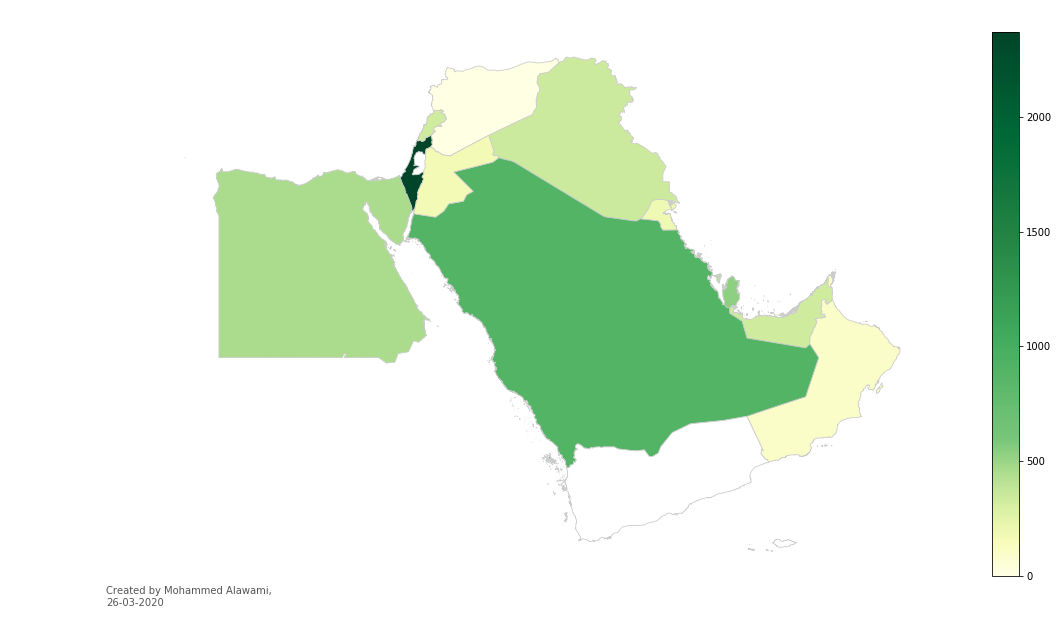

In [127]:
variable = 'total_cases'
# set the range for the choropleth
vmin, vmax = 10, gcc_corona_map.total_cases.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))
cmap = 'YlGn'

divnorm = colors.DivergingNorm(vmin=0, vcenter=600, vmax=vmax)

gcc_corona_map.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', norm=divnorm, legend=True, missing_kwds={"color": "white"})

ax.axis('off')
# add a title
ax.set_title(' ', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ann = 'Created by Mohammed Alawami, \n{}'.format(today)
ax.annotate(ann,
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')
plt.show()

fig.savefig('gccmap.png', dpi=300)